In [1]:
# Install the torch package
%pip install torch numpy matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import random

import pandas as pd
import matplotlib.pyplot as plt

from goyalWelchData import GoyalWelchData
from flexibleMLP import FlexibleMLP
from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = GoyalWelchData(input_file='tlt_monthly_returns.csv', symbol = 'TLT')
X_train, X_test, y_train, y_test, test_dates = goyal_welch_data.get_train_and_test_data()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


/workspaces/Quantative-Macroeconomics-with-Python/notebooks/goyalWelchData.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.goyal_welch_data['excess_returns'] = self.monthly_returns[symbol] - self.goyal_welch_data.Rfree


In [3]:
# Initialize the deep neural network model
num_seeds = 10
ridge_penalty = 0.001

FlexibleMLP.set_seed(42)
width = 100
model_architecture = [X_train.shape[1], width, width, 1]
models = [FlexibleMLP(model_architecture) for seed in range(num_seeds)]

# Proceed with the rest of the setup (loss, optimizer) and training loop as before
# Loss and optimizer
for seed in range(num_seeds):

  FlexibleMLP.set_seed(seed)
  criterion = nn.MSELoss()
  #optimizer = optim.Adam(models[seed].parameters(), lr=0.001) #, weight_decay=0)  # Using Adam optimizer for better performance with deep networks
  optimizer = optim.SGD(models[seed].parameters(), lr=0.1)

  train_model(num_epochs=200,
              train_loader=train_loader,
              criterion=criterion,
              optimizer=optimizer,
              model=models[seed],
              ridge_penalty=ridge_penalty)

Epoch [20/200], Loss: 0.2003
Epoch [40/200], Loss: 0.1947
Epoch [60/200], Loss: 0.1879


Epoch [80/200], Loss: 0.1827
Epoch [100/200], Loss: 0.1767
Epoch [120/200], Loss: 0.1717


Epoch [140/200], Loss: 0.1659
Epoch [160/200], Loss: 0.1600
Epoch [180/200], Loss: 0.1556


Epoch [200/200], Loss: 0.1499
Epoch [20/200], Loss: 0.1998
Epoch [40/200], Loss: 0.1930


Epoch [60/200], Loss: 0.1862
Epoch [80/200], Loss: 0.1809
Epoch [100/200], Loss: 0.1749


Epoch [120/200], Loss: 0.1696
Epoch [140/200], Loss: 0.1647
Epoch [160/200], Loss: 0.1594


Epoch [180/200], Loss: 0.1545
Epoch [200/200], Loss: 0.1491
Epoch [20/200], Loss: 0.2038


Epoch [40/200], Loss: 0.1979
Epoch [60/200], Loss: 0.1913
Epoch [80/200], Loss: 0.1845


Epoch [100/200], Loss: 0.1785
Epoch [120/200], Loss: 0.1727
Epoch [140/200], Loss: 0.1674


Epoch [160/200], Loss: 0.1625
Epoch [180/200], Loss: 0.1571
Epoch [200/200], Loss: 0.1525


Epoch [20/200], Loss: 0.1999
Epoch [40/200], Loss: 0.1927
Epoch [60/200], Loss: 0.1867


Epoch [80/200], Loss: 0.1810
Epoch [100/200], Loss: 0.1749


Epoch [120/200], Loss: 0.1696
Epoch [140/200], Loss: 0.1634
Epoch [160/200], Loss: 0.1590


Epoch [180/200], Loss: 0.1539
Epoch [200/200], Loss: 0.1488
Epoch [20/200], Loss: 0.2016


Epoch [40/200], Loss: 0.1925
Epoch [60/200], Loss: 0.1860


Epoch [80/200], Loss: 0.1807
Epoch [100/200], Loss: 0.1755


Epoch [120/200], Loss: 0.1689
Epoch [140/200], Loss: 0.1643


Epoch [160/200], Loss: 0.1586
Epoch [180/200], Loss: 0.1536
Epoch [200/200], Loss: 0.1487


Epoch [20/200], Loss: 0.1951
Epoch [40/200], Loss: 0.1888
Epoch [60/200], Loss: 0.1835


Epoch [80/200], Loss: 0.1771
Epoch [100/200], Loss: 0.1715
Epoch [120/200], Loss: 0.1660


Epoch [140/200], Loss: 0.1610
Epoch [160/200], Loss: 0.1556
Epoch [180/200], Loss: 0.1508


Epoch [200/200], Loss: 0.1462
Epoch [20/200], Loss: 0.1966
Epoch [40/200], Loss: 0.1901


Epoch [60/200], Loss: 0.1839
Epoch [80/200], Loss: 0.1784
Epoch [100/200], Loss: 0.1728


Epoch [120/200], Loss: 0.1674
Epoch [140/200], Loss: 0.1624
Epoch [160/200], Loss: 0.1571


Epoch [180/200], Loss: 0.1524
Epoch [200/200], Loss: 0.1471
Epoch [20/200], Loss: 0.1886


Epoch [40/200], Loss: 0.1830
Epoch [60/200], Loss: 0.1766
Epoch [80/200], Loss: 0.1713


Epoch [100/200], Loss: 0.1658
Epoch [120/200], Loss: 0.1608
Epoch [140/200], Loss: 0.1560


Epoch [160/200], Loss: 0.1514
Epoch [180/200], Loss: 0.1462


Epoch [200/200], Loss: 0.1414
Epoch [20/200], Loss: 0.1967
Epoch [40/200], Loss: 0.1906


Epoch [60/200], Loss: 0.1852
Epoch [80/200], Loss: 0.1797


Epoch [100/200], Loss: 0.1730
Epoch [120/200], Loss: 0.1675


Epoch [140/200], Loss: 0.1627
Epoch [160/200], Loss: 0.1575
Epoch [180/200], Loss: 0.1521


Epoch [200/200], Loss: 0.1476
Epoch [20/200], Loss: 0.1995
Epoch [40/200], Loss: 0.1935


Epoch [60/200], Loss: 0.1870
Epoch [80/200], Loss: 0.1804
Epoch [100/200], Loss: 0.1753


Epoch [120/200], Loss: 0.1693
Epoch [140/200], Loss: 0.1638


Epoch [160/200], Loss: 0.1588
Epoch [180/200], Loss: 0.1542


Epoch [200/200], Loss: 0.1491


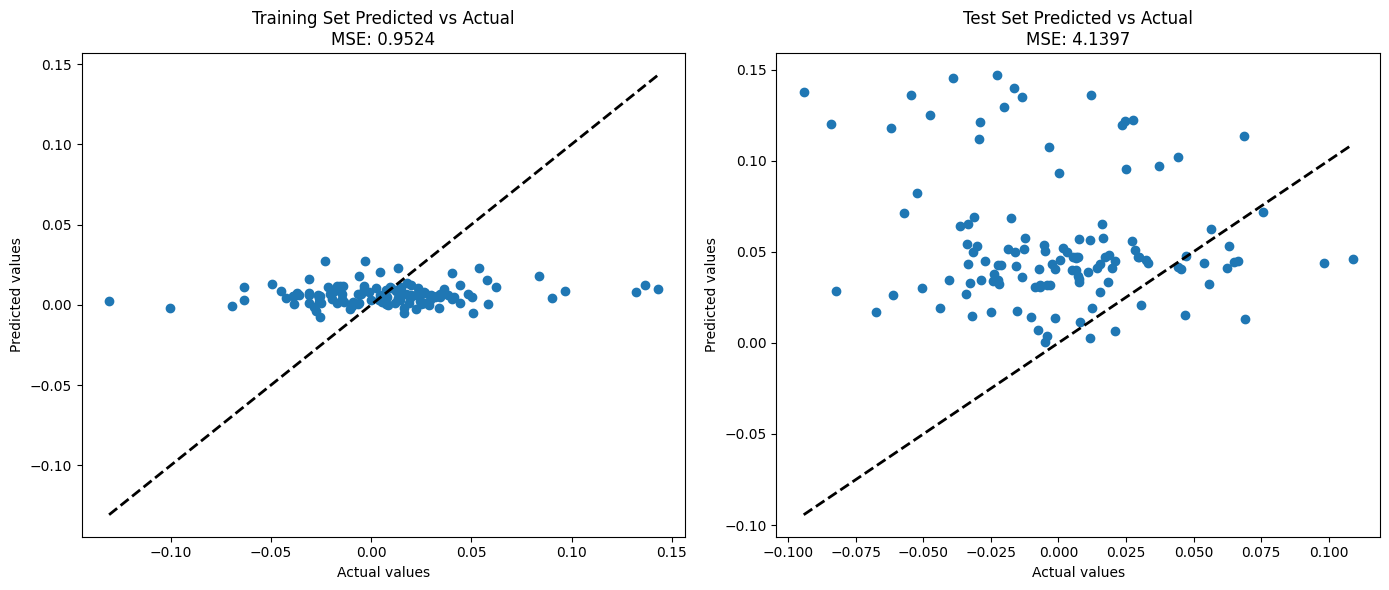

In [4]:
# Get predictions for both training and test sets
train_sample = [get_predictions(train_loader, models[seed]) for seed in range(num_seeds)]
test_sample = [get_predictions(test_loader, models[seed]) for seed in range(num_seeds)]
train_targets = train_sample[0][0]

#
train_predictions = np.concatenate([train_sample[seed][1].reshape(-1, 1) for seed in range(num_seeds)], axis=1).mean(1)

test_targets = test_sample[0][0]
all_test_predictions = np.concatenate([test_sample[seed][1].reshape(-1, 1) for seed in range(num_seeds)], axis=1)
test_predictions = all_test_predictions.mean(1)

# Calculate MSE for both training and test sets
train_mse = np.mean((train_targets - train_predictions) ** 2) / np.mean(train_targets ** 2)
test_mse = np.mean((test_targets.reshape(-1, 1) - test_predictions) ** 2) / np.mean(test_targets ** 2)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Training set subplot
axs[0].scatter(train_targets, train_predictions)
axs[0].plot([train_targets.min(), train_targets.max()], [train_targets.min(), train_targets.max()], 'k--', lw=2)  # Diagonal line
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].set_title(f'Training Set Predicted vs Actual\nMSE: {train_mse:.4f}')

# Test set subplot
axs[1].scatter(test_targets, test_predictions)#.mean(1))
axs[1].plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)  # Diagonal line
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('Predicted values')
axs[1].set_title(f'Test Set Predicted vs Actual\nMSE: {test_mse:.4f}')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, '0    0.03\n1   -0.23\ndtype: float32')

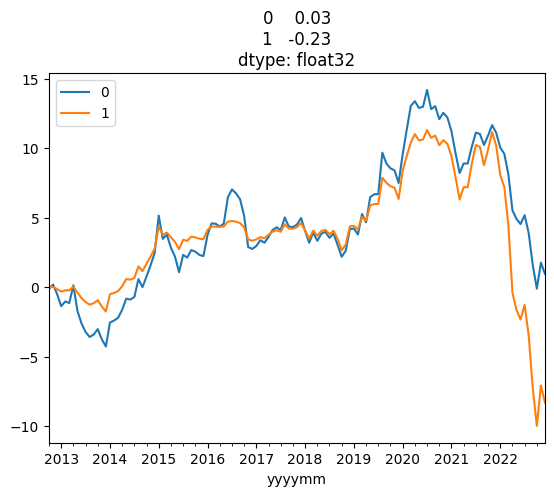

In [5]:
# now I define R_{t+1} * pi_t
# test_predictions have 10 columns, each column corresponding to a different random seed
timed_returns = test_targets.reshape(-1, 1) * test_predictions.reshape(-1, 1)
together = pd.DataFrame(np.concatenate([test_targets.reshape(-1, 1), timed_returns], axis=1), index=test_dates)
(together / together.std()).cumsum().plot()
plt.title(f'{GoyalWelchData.sharpe_ratio(together)}')

In [6]:
model = models[0]
model.eval()
train_data_predictions, train_data_features = model(X_train_tensor, return_last_hidden=True)
print(train_data_predictions.shape)
print(train_data_features.shape)

test_data_predictions, test_data_features = model(X_test_tensor, return_last_hidden=True)


torch.Size([122, 1])
torch.Size([122, 100])


In [7]:
output_layer = list(model.layers)[-1]  # Get the last layer
# Now, access its weights and biases
weights = output_layer.weight.data
biases = output_layer.bias.data
print("Weights of the output layer:", weights)
print("Biases of the output layer:", biases)

Weights of the output layer: tensor([[-0.0099,  0.0452, -0.0141,  0.0305,  0.1019, -0.1263, -0.0021, -0.0881,
          0.1015, -0.0336, -0.0097,  0.0280,  0.0349, -0.1256, -0.0342, -0.1162,
         -0.0846, -0.0254,  0.0096,  0.0155, -0.0279, -0.0262,  0.0616, -0.0272,
         -0.0464, -0.0789,  0.0535,  0.0831,  0.0380,  0.1250, -0.0321,  0.0066,
         -0.0477, -0.0092,  0.0324,  0.1046,  0.0922, -0.0626,  0.1120,  0.0071,
         -0.0025,  0.0131,  0.0067, -0.0739,  0.0311,  0.0766,  0.0010, -0.1669,
         -0.0801, -0.0364, -0.0079,  0.1486,  0.0876,  0.0876, -0.0258,  0.0656,
         -0.0608, -0.0213,  0.0868, -0.0138,  0.1306, -0.1390, -0.0464,  0.0371,
          0.0522,  0.0089, -0.1575, -0.0579, -0.0623, -0.0405, -0.0138,  0.0083,
          0.0304,  0.0426,  0.0858, -0.0206, -0.0483, -0.0767,  0.0840, -0.0631,
         -0.1152,  0.0106,  0.1812,  0.1003,  0.0163, -0.0469, -0.0291,  0.0401,
          0.1072, -0.1317,  0.0009, -0.1022, -0.0777,  0.0045,  0.0920, -0.0626,

In [8]:
new_X_train = torch.concatenate([train_data_features, torch.ones([train_data_features.shape[0], 1])], axis=1)
new_X_test = torch.concatenate([test_data_features, torch.ones([test_data_features.shape[0], 1])], axis=1)

In [9]:
shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=new_X_train.detach().numpy(),
                                                                labels=y_train,
                                                                future_signals=new_X_test.detach().numpy(),
                                                                shrinkage_list=shrinkage_list)


In [10]:
fine_tuned_mse = np.mean((test_targets.reshape(-1, 1) - oos_predictions) ** 2, axis=0) / np.mean((test_targets) ** 2)
print(fine_tuned_mse)

[87.1644294   8.6011461  10.46048224  7.71780136  2.267893    1.14500969
  1.02539563  1.00170682  1.00010266  1.00000936]


Text(0.5, 1.0, '0     0.03\n1    -0.15\n2    -0.27\n3    -0.27\n4    -0.22\n5    -0.17\n6    -0.11\n7    -0.06\n8    -0.05\n9    -0.05\n10   -0.05\ndtype: float64')

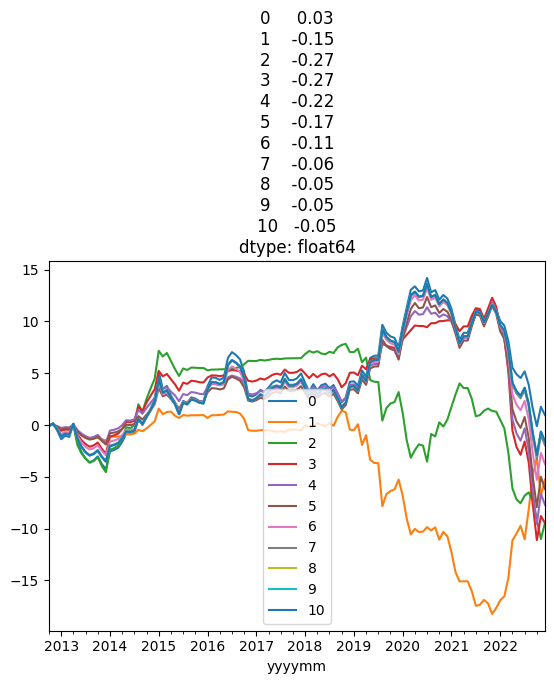

In [11]:
timed_returns = test_targets.reshape(-1, 1) * oos_predictions
together = pd.DataFrame(np.concatenate([test_targets.reshape(-1, 1), timed_returns], axis=1), index=test_dates)
(together / together.std()).cumsum().plot()
plt.title(f'{GoyalWelchData.sharpe_ratio(together)}')